<center>
    <h1>EM Connectomics - Question 3</h1>
    <h2>Summer Workshop on the Dynamic Brain</h2>
    <h3>Wednesday, August 25, 2021</h3>
</center>

**Task 3:** Do the targets of a pyramidal cell differ as you get farther away from the soma?

Various studies have found that cortical excitatory neurons exhibit targeting preferences that change with distance along the axon. For example, in medial entorhinal cortex, [Schmidt et al.](https://pubmed.ncbi.nlm.nih.gov/28959971/) found that, closer to the soma, there was a bias toward targeting inhibitory neurons. We're going to look at this question from our EM dataset. This question will extend the target analysis from Task 2 and add in spatial information about the synapse locations from skeletons.

**Task 3.0:** Import the key modules and initialize a client

In [1]:
# Import modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from meshparty import meshwork
from caveclient import CAVEclient

# Initialize a client for the "minnie65_public_v343" datastack.

client = CAVEclient('minnie65_public_v343')

**Task 3.1:** Find where the output synapses are on our neuron relative to the soma in both physical space and as a path along the arbor.

For this step, for each axonal presynaptic site synapse compute the distance to the soma as both a euclidean value and a distance along the axon. As a check at the end, visualize the distribution of the two distances. For this example, use `root_id = 864691134884807418`, which is a proofread L2/3 pyramidal cell in one of the HVAs. If you have time, feel free to look at the same analysis with other neurons.

In [2]:
root_id = 864691134884807418

# Get nucleus id to look up the filename:
soma_df = client.materialize.query_table('nucleus_neuron_svm', filter_equal_dict={'pt_root_id': root_id})
nucleus_id = soma_df.loc[0].id

In [3]:
# Load the h5 file for the root id specified

filename = f'{root_id}_{nucleus_id}'

# Set the correct path for the setup you are using
import platform
import os

platstring = platform.platform()
if ('Darwin' in platstring) or ('macOS' in platstring):
    # macOS 
    data_root = "/Volumes/Brain2022/em-connectomics"
elif 'Windows'  in platstring:
    # Windows (replace with the drive letter of USB drive)
    data_root = "E:/em-connectomics"
elif ('amzn' in platstring):
    # then on AWS
    data_root = "/data/em-connectomics-data/"
else:
    # then your own linux platform
    # EDIT location where you mounted hard drive
    data_root = "/media/$USERNAME/Brain2022/em-connectomics"
# or just set this manually if somewhere else
# data_root = 
nrn = meshwork.load_meshwork(f"{data_root}/{filename}.h5")

In [4]:
# Extract synapse info into a dataframe

# Basic version — acceptable
pre_syn_df = nrn.anno.pre_syn.df

# Better version — to be careful, restrict to only outputs on the axon.
axon_filter = nrn.anno.pre_syn.filter_query(nrn.anno.is_axon.mesh_mask)
pre_syn_df = axon_filter.df

pre_syn_df

,ctr_pt_position,id,post_pt_position,post_pt_root_id,post_pt_supervoxel_id,pre_pt_level2_id,pre_pt_mesh_ind,pre_pt_position,pre_pt_root_id,pre_pt_supervoxel_id,size,valid,pre_pt_mesh_ind_filt
0,"[299538, 172674, 25072]",367491011,"[299510, 172600, 25076]",864691136902999474,105919942108953181,177977536146310148,8269,"[299484, 172656, 25069]",864691134884807418,105919942108940243,204,t,8269
1,"[292052, 89740, 21712]",349918265,"[292042, 89696, 21708]",864691135366983673,104923646732264599,176981240769938029,4276,"[292042, 89778, 21703]",864691134884807418,104923646732265649,29736,t,4276
2,"[292726, 104054, 21763]",349004550,"[292774, 104004, 21763]",864691135777517245,104995939621873749,177053533659464093,4518,"[292646, 104048, 21763]",864691134884807418,104995939621871890,6056,t,4518
3,"[329024, 184816, 17849]",413771412,"[329056, 184772, 17850]",864691132507877415,110002977599122950,182060571636532070,16302,"[329026, 184822, 17847]",864691134884807418,110002977599122947,2664,t,16302
4,"[311514, 146516, 26638]",385542086,"[311504, 146540, 26640]",864691135736337812,107605287543821502,179662881581695035,13365,"[311534, 146538, 26642]",864691134884807418,107605287543822688,1804,t,13365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,"[302362, 175236, 22825]",366653509,"[302408, 175268, 22827]",864691135382467290,106342497902742172,178400091940323756,9929,"[302330, 175252, 22831]",864691134884807418,106342497902761349,7248,t,9929
566,"[300870, 143964, 25010]",364580390,"[300840, 143940, 25008]",864691135925897486,106127200050714035,178184794088145665,9012,"[300864, 144012, 25011]",864691134884807418,106127200050719538,1160,t,9012
567,"[309358, 140720, 19438]",378567708,"[309314, 140704, 19435]",864691132827980314,107323055646764866,179380649684108403,12785,"[309368, 140670, 19446]",864691134884807418,107323055646782027,2920,t,12785
568,"[291894, 90454, 21577]",349918164,"[291886, 90416, 21581]",864691135334077456,104923784171083838,176981378208891058,4279,"[291938, 90436, 21580]",864691134884807418,104923784171081662,4652,t,4279


In [5]:
# Get euclidean distance for each synapse
voxel_resolution = np.array([4,4,40])

soma_loc_nm = soma_df.loc[0]['pt_position'] * voxel_resolution
syn_loc_nm = np.vstack(pre_syn_df['ctr_pt_position'].values) * voxel_resolution

# Simpler version using the filter query object:
# syn_loc_nm = axon_filter.points

d_syn_euc_um = np.linalg.norm(syn_loc_nm - soma_loc_nm, axis=1) / 1_000 # Convert to microns

In [6]:
# Get on-arbor distance for each synapse

# Direct approach:
d_syn_path_um = nrn.distance_to_root( pre_syn_df['pre_pt_mesh_ind'] ) / 1_000

# Simpler version using the filter_query:
# d_syn_path_um = nrn.distance_to_root(axon_filter.mesh_index) / 1_000

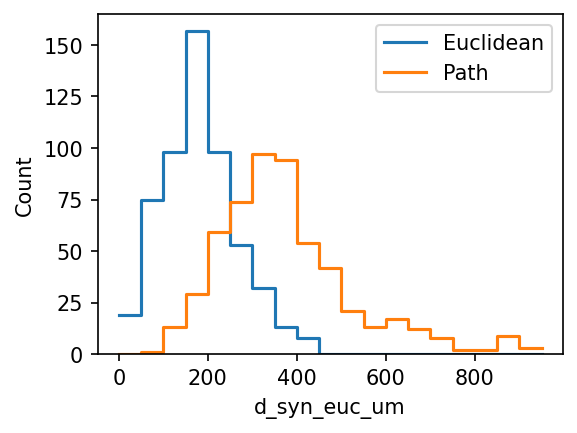

In [7]:
# Visualize the two distances as a histogram
# For bins, use 50 micron bins up to a distance of 1000 microns.

pre_syn_df['d_syn_euc_um'] = d_syn_euc_um
pre_syn_df['d_syn_path_um'] = d_syn_path_um

bins = np.arange(0, 1000, 50)

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
sns.histplot(
    x='d_syn_euc_um',
    data=pre_syn_df,
    bins=bins,
    ax=ax,
    stat='count',
    element='step',
    fill=False,
)

sns.histplot(
    x='d_syn_path_um',
    data=pre_syn_df,
    bins=bins,
    ax=ax,
    stat='count',
    element='step',
    fill=False,
)

ax.legend(['Euclidean', 'Path'])

**Task 3.2:** Compute what cell type (if known) does each synapse target.

For this step, for each axonal presynaptic site synapse compute the target cell type if it is a single soma, or else label it 'unclassified'.

In [8]:
# Get the soma table and compute single soma root ids

soma_all_df = client.materialize.query_table('nucleus_neuron_svm', filter_equal_dict={'cell_type': 'neuron'})
soma_all_df['n_soma'] = soma_all_df.groupby('pt_root_id')['id'].transform('count')
soma_all_df['is_single'] = soma_all_df['n_soma']==1

In [9]:
# Find which targets of our cell are onto single-soma neurons.

# There are a lot of ways to do this step — here is one
pre_syn_df_ct = (
    pre_syn_df.merge(
        soma_all_df.query("is_single == True")[["pt_root_id", "is_single"]],
        how="left",
        left_on="post_pt_root_id",
        right_on="pt_root_id",
    )
    .drop(columns="pt_root_id")
    .fillna(False)
)

single_soma_ids = np.unique(pre_syn_df_ct.query('is_single==True')['post_pt_root_id'])

In [10]:
# Get the cell type of those single soma targets and add them as a labeled column

ct_table = "aibs_soma_nuc_metamodel_preds_v117"
ct_all_df = client.materialize.query_table(ct_table)
single_soma_cell_type_df = ct_all_df.query("pt_root_id in @single_soma_ids and classification_system=='aibs_neuronal'")

pre_syn_df_ct = pre_syn_df_ct.merge(
    single_soma_cell_type_df[["pt_root_id", "cell_type"]],
    how="left",
    left_on="post_pt_root_id",
    right_on="pt_root_id",
).drop(columns="pt_root_id")

In [11]:
valence_map = {
    'MC': 'Inh',
    'BC': 'Inh',
    'BPC': 'Inh',
    'NGC': 'Inh',
    '23P': "Exc",
    '4P': "Exc",
    '5P-IT': "Exc",
    '5P-ET': "Exc",
    '5P-NP': "Exc",
    '6P-IT': "Exc",
    '6P-CT': "Exc",
}

pre_syn_df_ct['valence'] = pre_syn_df_ct['cell_type'].replace(valence_map)

In [12]:
### After all this merging, it is useful to double check that you haven't accidentally introduced extra rows, so let's check that the original length and the cell-typed lengths are the same
len(pre_syn_df_ct) == len(pre_syn_df)

True

**Task 3.3:** Measure how the target cell type change with distance.

Here, look at the distribution of target preference as a function of distance from soma. First, make histograms of targeting by cell type and distance from soma using both distances. How do they differ? Next, bin the data by distance and compute the fraction of targets that are excitatory, and plot this value as a function of distance. For bins, use a 50 micron bin width.

Text(0.5, 0, 'Distance ($\\mu m$)')

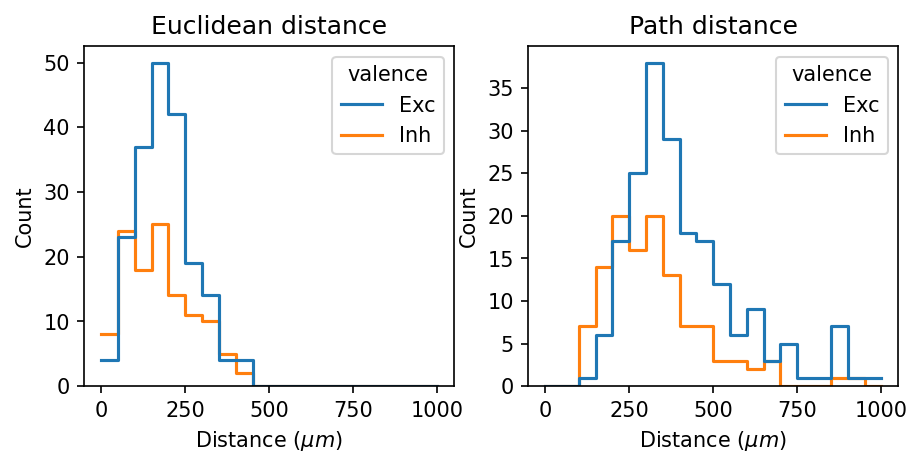

In [13]:
# Visualize the two distances as a histogram

bins = np.arange(0, 1000+1, 50)

fig, axes = plt.subplots(figsize=(7,3), ncols=2, dpi=150)

ax= axes[0]
sns.histplot(
    x='d_syn_euc_um',
    hue='valence',
    data=pre_syn_df_ct,
    bins=bins,
    ax=ax,
    stat='count',
    element='step',
    fill=False,
)
ax.set_title('Euclidean distance')
ax.set_xlabel('Distance ($\mu m$)')

ax= axes[1]
sns.histplot(
    x='d_syn_path_um',
    hue='valence',
    data=pre_syn_df_ct,
    bins=bins,
    ax=ax,
    stat='count',
    element='step',
    fill=False,
)
ax.set_title('Path distance')
ax.set_xlabel('Distance ($\mu m$)')


In [15]:
# Now we bin the data:

# Find the fraction of synpases that are excitatory for that are excitatory in each bin.
# If you want to get a confidence interval as well, look at the function `proportion_confint` in the statsmodels python package

pre_syn_df_ct['euc_bin'] = np.digitize(pre_syn_df_ct['d_syn_euc_um'], bins)
pre_syn_df_ct['path_bin'] = np.digitize(pre_syn_df_ct['d_syn_path_um'], bins)

In [16]:
# A solution is only shown for the path-distance, but everything is the same for path vs euclidean.

path_bin_count_df = pre_syn_df_ct.pivot_table(
    index='path_bin',
    columns='valence',
    values='id',
    aggfunc='count',
    fill_value=0,
)

path_bin_count_df['Total'] = path_bin_count_df['Exc']+path_bin_count_df['Inh']
path_bin_count_df['inh_frac'] = path_bin_count_df['Inh']/path_bin_count_df['Total']

In [17]:
import statsmodels.api as sm

lower_bound, upper_bound = sm.stats.proportion_confint(
    path_bin_count_df["Inh"], path_bin_count_df["Total"], method="wilson"
)

path_bin_count_df["inf_frac_lb"] = lower_bound
path_bin_count_df["inf_frac_ub"] = upper_bound

Text(0, 0.5, 'Fraction inhibitory')

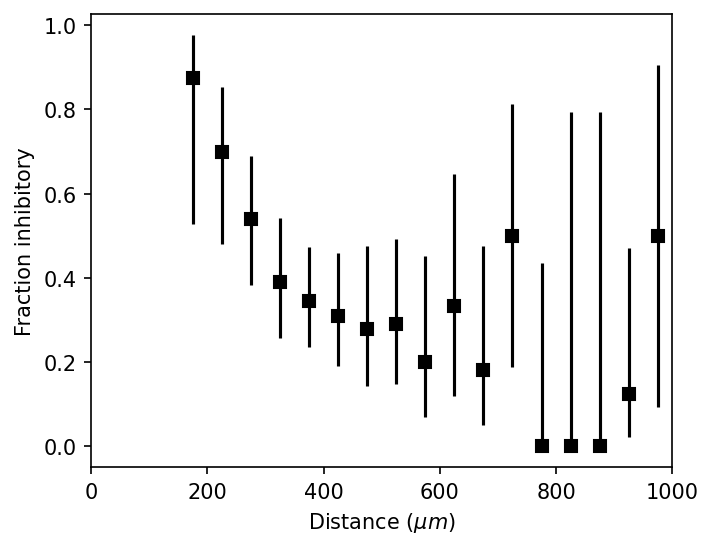

In [18]:
# Visualize fraction of synpases that excitatory as a function of distance bins (with errorbars if you computed confidence intervals)

# Generate a list of the locations for each bin
bin_center = bins+np.diff(bins).mean()/2
path_bin_count_df['bin_location'] = bin_center[path_bin_count_df.index]

# Build the error bar matrix that matplotlib expects
err = np.vstack(
    (
        np.abs(path_bin_count_df['inf_frac_lb']-path_bin_count_df['inh_frac']),
        np.abs(path_bin_count_df['inf_frac_ub']-path_bin_count_df['inh_frac']),
    )
)

fig, ax = plt.subplots(figsize=(5,4), dpi=150)
ax.errorbar(
    path_bin_count_df['bin_location'],
    path_bin_count_df['inh_frac'],
    err,
    marker='s',
    color='k',
    linestyle='none',
)

ax.set_xlim(bins[0], bins[-1])
ax.set_xlabel('Distance ($\mu m$)')
ax.set_ylabel('Fraction inhibitory')